In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [82]:
df = pd.read_csv(r'data/direct_transitivity_data.csv')
df.head()

,Index,File,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,Opttime,Status,Nodes visited,Setup Time,config
0,0,north/g.10.72.graphml,10,12,0,8,7,15,20,0,0.000556,2,0,0.020,d_235689
1,1,north/g.13.45.graphml,13,13,0,6,2,8,8,0,0.000291,2,0,0.001,d_235689
2,2,north/g.10.11.graphml,10,10,0,15,0,15,40,0,0.000040,2,0,0.002,d_235689
3,3,Rome-Lib/graficon11nodi/grafo233.11,11,18,0,15,12,27,36,0,0.002283,2,0,0.003,d_235689
4,4,Rome-Lib/graficon12nodi/grafo2240.12,12,16,0,12,11,23,30,0,0.000364,2,0,0.002,d_235689


In [83]:
str_list = ["1", "2", "3","4","5","6","7","8","9"]

for val in str_list:
    df[val] = df["config"].str.contains(val).astype(int)

df.drop(['config'], inplace=True, axis = 1)

In [84]:
df['Status'].value_counts()

2    437453
9    151347
Name: Status, dtype: int64

In [85]:
df[df['Opttime']>60][['Nodes', 'Crossings','Opttime','Status']]

,Nodes,Crossings,Opttime,Status
267,64,940,60.404265,9
368,56,21,60.117755,9
374,35,21,60.181258,9
379,47,21,60.220476,9
382,44,55,60.306249,9
...,...,...,...,...
588795,83,415,60.073141,9
588796,92,643,60.113764,9
588797,91,210,60.284327,9
588798,100,39,60.040396,9


### Distribution of Opttime of opttime

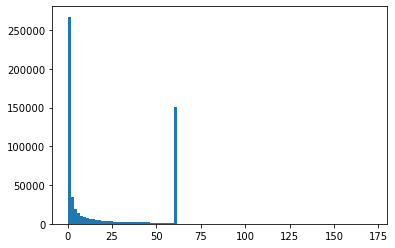

In [97]:
plt.hist(df['Opttime'], bins = 100)
plt.show()

### Distribution of Opttime of opttime less than 60 / status =2 

In [94]:
opttime_status_2 = df[df['Status']==2]['Opttime'].to_numpy()




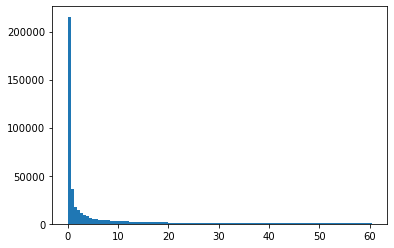

In [95]:
plt.hist(opttime_status_2, bins = 100)
plt.show()

### Distribution of Opttime in Ranges

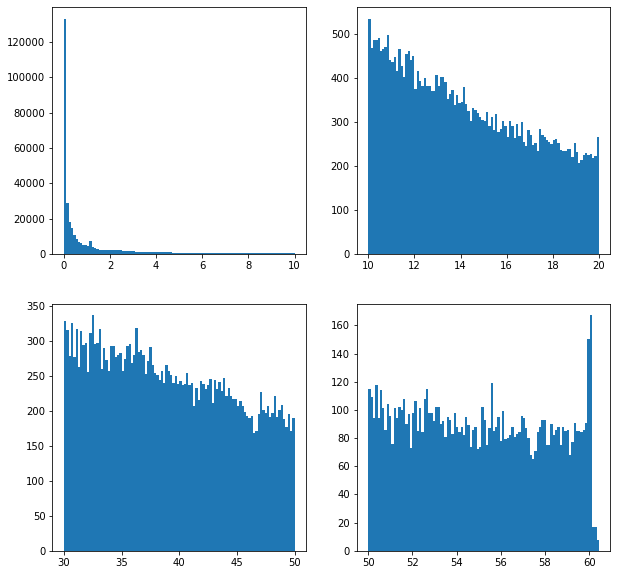

In [100]:
opttime_between_less_10 = df[(df['Opttime']<10)]['Opttime'].to_numpy()
opttime_between_10_30 = df[(df['Opttime']>10)&(df['Opttime']<20)]['Opttime'].to_numpy()
optime_between_30_50 = df[(df['Opttime']>30)&(df['Opttime']<50)]['Opttime'].to_numpy()
optime_between_50_60 = df[(df['Opttime']>50)&(df['Status']==2)]['Opttime'].to_numpy()

fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].hist(opttime_between_less_10, bins = 100)
ax[0,1].hist(opttime_between_10_30, bins = 100)
ax[1,0].hist(optime_between_30_50, bins = 100)
ax[1,1].hist(optime_between_50_60, bins = 100)

plt.show()

### Attempt to transform and plot opttime

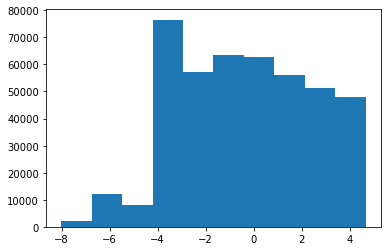

In [101]:
fitted_data, fitted_lambda = stats.boxcox(opttime_status_2)
plt.hist(fitted_data)
plt.show()

### Distribution of transformed Opttime in Ranges

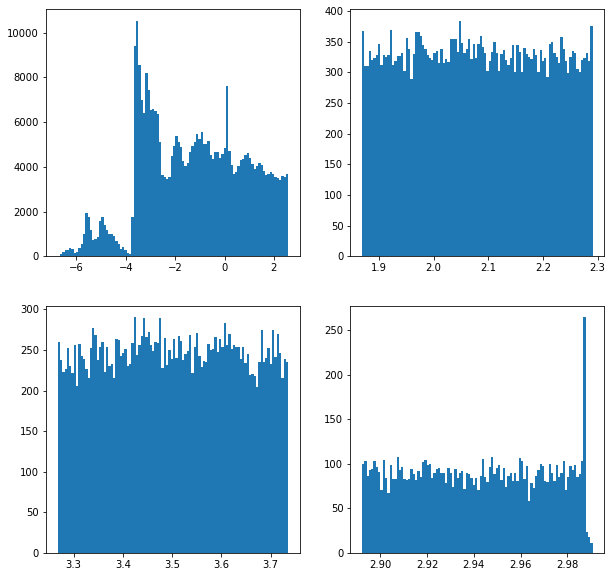

In [102]:
fitted_data_1, fitted_lambda_1 = stats.boxcox(opttime_between_less_10)
fitted_data_2, fitted_lambda_2 = stats.boxcox(opttime_between_10_30)
fitted_data_3, fitted_lambda_3 = stats.boxcox(optime_between_30_50)
fitted_data_4, fitted_lambda_4 = stats.boxcox(optime_between_50_60)

fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].hist(fitted_data_1, bins = 100)
ax[0,1].hist(fitted_data_2, bins = 100)
ax[1,0].hist(fitted_data_3, bins = 100)
ax[1,1].hist(fitted_data_4, bins = 100)

plt.show()